<a href="https://colab.research.google.com/github/Al-Ashir-Intisar/minneMUDAC2025/blob/main/training_files/initial_model_training_multiple_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import pandas as pd
import os

In [115]:
training_data_path = input("Enter the drive path of training data: ")

Enter the drive path of training data: /content/drive/Shareddrives/minneMUDAC2025/Data/combined_complete_df.csv


In [116]:
training_df = pd.read_csv(training_data_path).drop(columns=["...1", "Successful Match", "Little ID", "Big ID", "Match ID 18Char", "Days Match Activation to Note Completion avg", "Days Match Activation to Closure Meeting Date", "Big Age"])
col = training_df.pop("match_length")
training_df.insert(0, "match_length", col)
training_df.head()

,match_length,Big Days Acceptance to Match,Big Days Interview to Acceptance,Big Days Interview to Match,Big Days Approved to Match,Days Big Assesment Uploaded to Match,Big Days Contact Created to Match,Big Days Enrollment to Match,Days Little Acceptance to Match Activation Date,Days Little Application Recieved to Match Activation Date,...,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,mean_cadence
0,9.0,0,0,0,0,0,0,0,0,0,...,7,0,333,3,24,164,10,90,261,27.333333
1,9.0,0,0,0,0,0,0,0,0,0,...,7,0,333,3,24,164,10,90,261,27.333333
2,46.1,0,0,0,1,0,0,0,0,0,...,441,271,2316,265,340,1959,1014,1265,1377,72.789474
3,6.2,0,0,0,0,0,0,0,0,0,...,25,5,75,9,27,47,9,36,64,34.400000
4,85.6,0,0,0,9,0,0,0,0,0,...,578,1501,11777,281,2126,7859,388,2959,11632,73.028571


In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
correlation_mat = training_df.corr().round(2)
#print(correlation_mat)


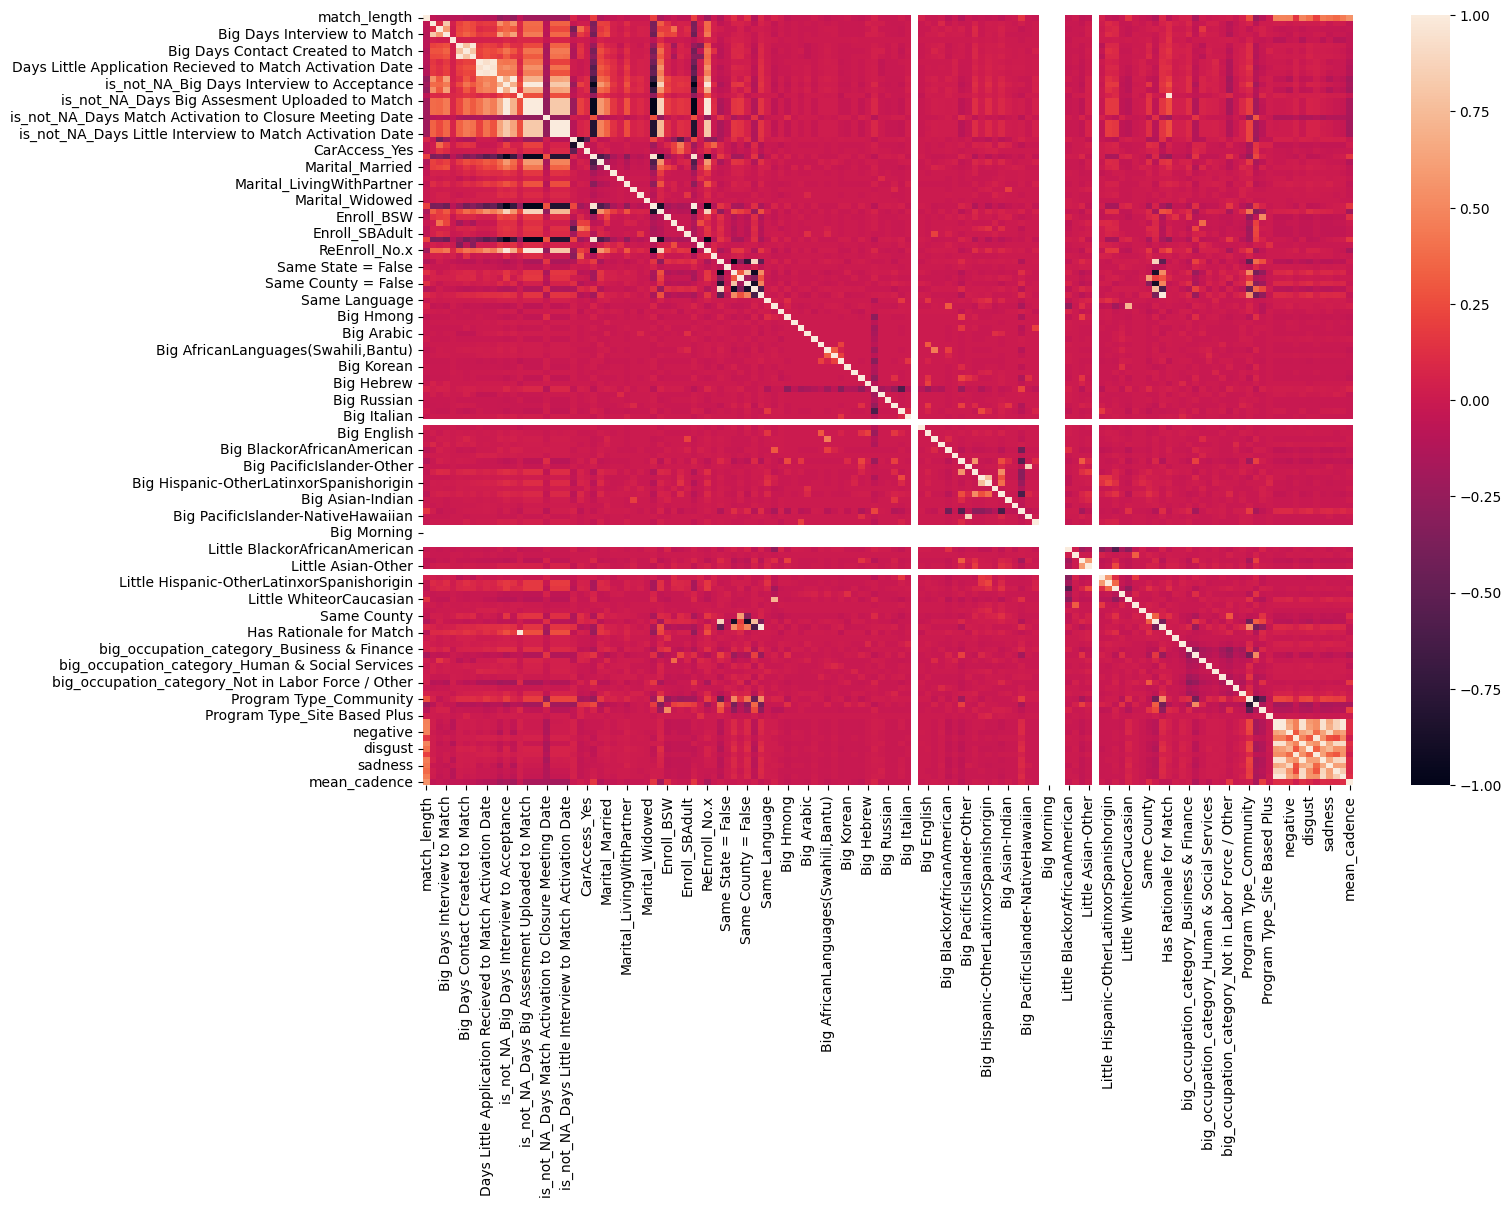

In [119]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat)
plt.show()

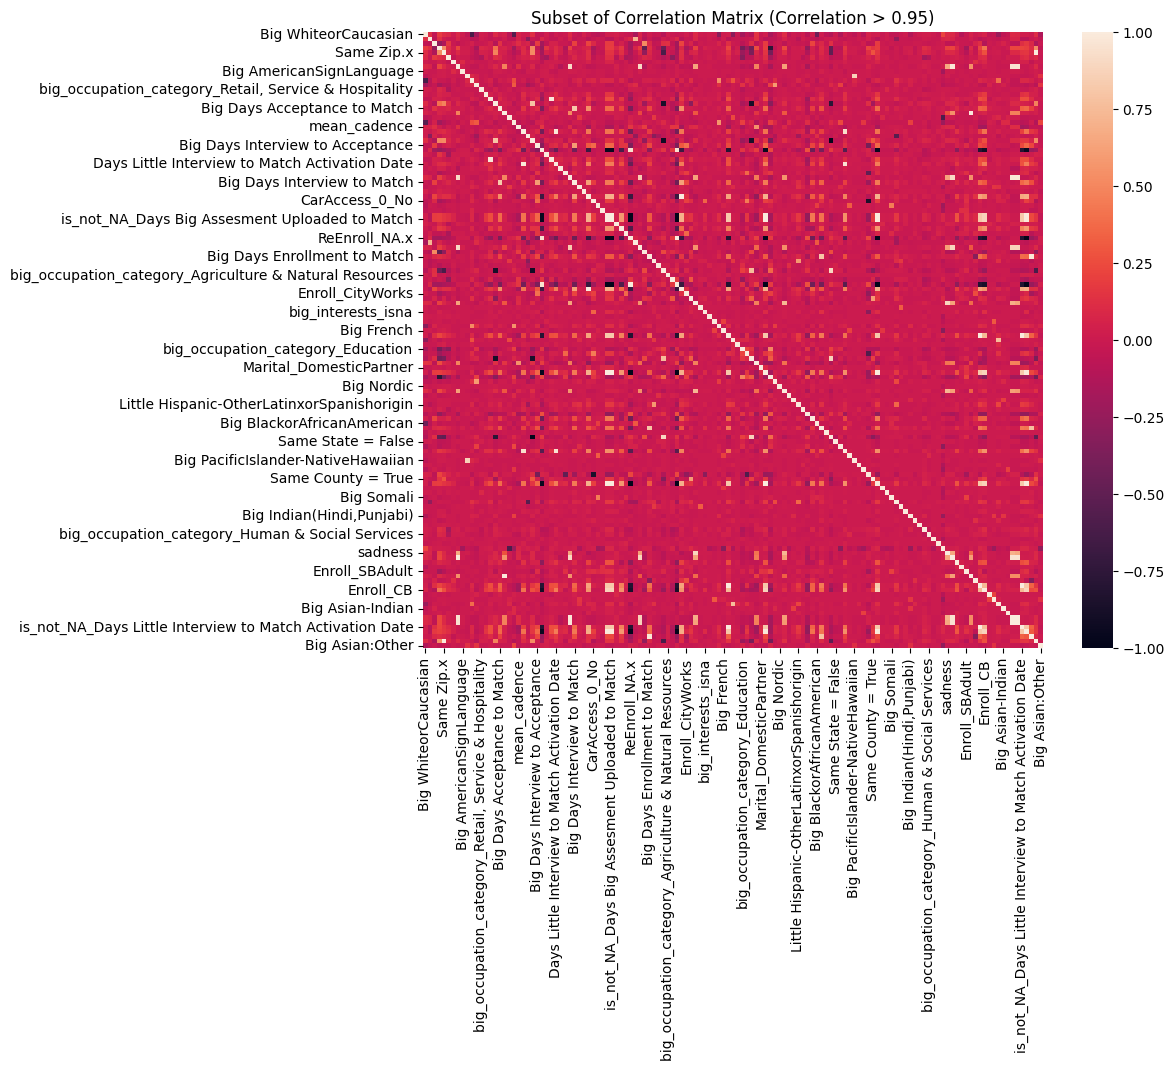

In [120]:
# create paiplot of subset of features correlation


# Method: Subset by high correlation
# Set a threshold (e.g., 0.5)
threshold = 0.95
high_corr_pairs = correlation_mat[abs(correlation_mat) > threshold]

# Get the features involved in high correlations
high_corr_features = set()
for col in high_corr_pairs.columns:
  high_corr_features.update(high_corr_pairs[high_corr_pairs[col].abs() > threshold].index.tolist())

# Create a subset of the correlation matrix with those features
high_corr_subset = correlation_mat.loc[list(high_corr_features), list(high_corr_features)]
plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_subset)
plt.title(f"Subset of Correlation Matrix (Correlation > {threshold})")
plt.show()

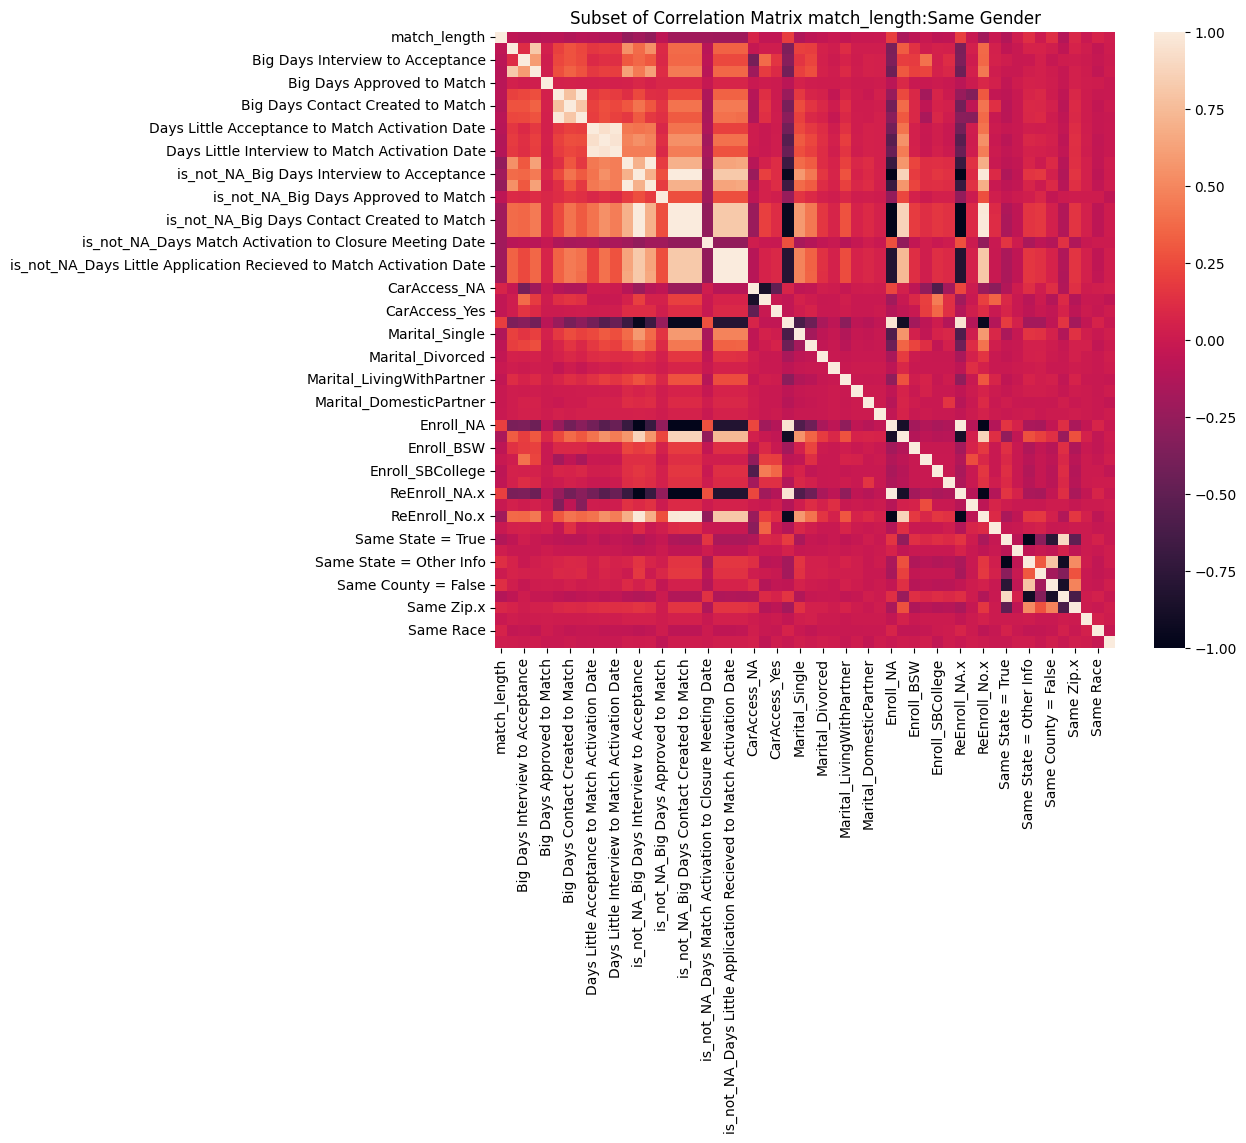

In [121]:
# Select the first "Match_length" to "Same Gender" columns and rows of the correlation matrix
selected_correlation = correlation_mat.loc["match_length":"Same Gender", "match_length":"Same Gender"]

plt.figure(figsize=(10, 8))
sns.heatmap(selected_correlation)
plt.title(f"Subset of Correlation Matrix match_length:Same Gender")
plt.show()


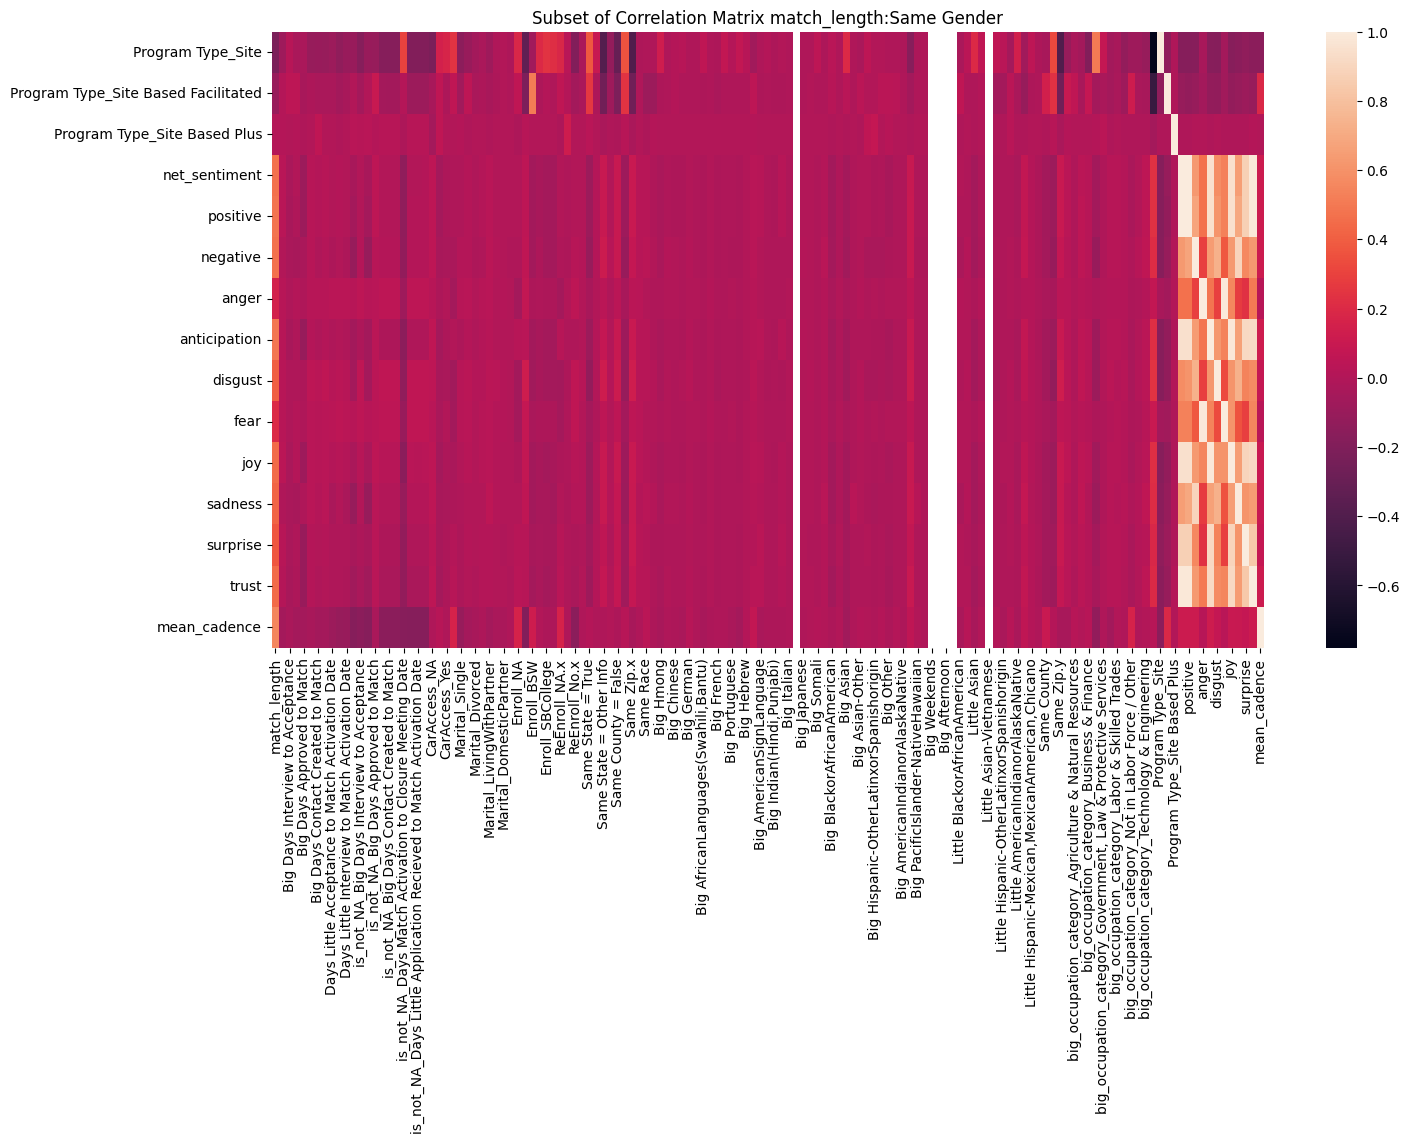

In [122]:
# explore the correlation between match Length and the anger fear surprise sentiment variables

selected_correlation = correlation_mat.loc["Program Type_Site":, :]

plt.figure(figsize=(16, 8))
sns.heatmap(selected_correlation)
plt.title(f"Subset of Correlation Matrix match_length:Same Gender")
plt.show()

In [123]:
correlation_mat.index

Index(['match_length', 'Big Days Acceptance to Match',
       'Big Days Interview to Acceptance', 'Big Days Interview to Match',
       'Big Days Approved to Match', 'Days Big Assesment Uploaded to Match',
       'Big Days Contact Created to Match', 'Big Days Enrollment to Match',
       'Days Little Acceptance to Match Activation Date',
       'Days Little Application Recieved to Match Activation Date',
       ...
       'negative', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'sadness', 'surprise', 'trust', 'mean_cadence'],
      dtype='object', length=139)

In [124]:
from sklearn.linear_model import Lasso, Ridge

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
# add cross validation

x_train, x_test, y_train, y_test = train_test_split(training_df.drop(columns=["match_length"]), training_df["match_length"], test_size=0.2, random_state=42)

In [127]:
# do hyper parameter tuning

lasso_model_alpha0p5 = Lasso(alpha=0.5)
lasso_model_alpha0p5.fit(x_train, y_train)

#print(f"Lasso (alpha 0.5): {lasso_model_alpha0p5.coef_[:]}")

Lasso(alpha=0.5)

In [128]:
import numpy as np

In [129]:
coefficients = lasso_model_alpha0p5.coef_
non_zero_coefficients = coefficients[np.abs(coefficients) > 1e-10] # Adjust tolerance as needed
non_zero_indices = np.where(np.abs(coefficients) > 1e-10)[0]

print("Non-zero coefficients:")
for coef, index in zip(non_zero_coefficients, non_zero_indices):
  print(f"Feature {x_train.columns[index]}: {coef}")

Non-zero coefficients:
Feature Big Days Acceptance to Match: 0.005643176456445587
Feature Big Days Interview to Match: -0.006248255201494256
Feature Big Days Approved to Match: -0.003345661715863669
Feature Days Big Assesment Uploaded to Match: 0.009124748103453819
Feature Big Days Contact Created to Match: -0.0036751294732363716
Feature Big Days Enrollment to Match: -0.010635851816537818
Feature Days Little Acceptance to Match Activation Date: 0.005093452453150172
Feature Days Little Application Recieved to Match Activation Date: -0.014881887824767605
Feature Days Little Interview to Match Activation Date: 0.008368727171099507
Feature Program Type_Community: 3.373891519344979
Feature net_sentiment: -0.0006266394602750107
Feature positive: 3.7831420454392905e-05
Feature negative: 0.007559815521763193
Feature anger: -0.004022556487800813
Feature anticipation: 0.005222238005526569
Feature disgust: 0.008758098477187741
Feature fear: -4.9879954003045806e-05
Feature joy: -0.0011638197836486

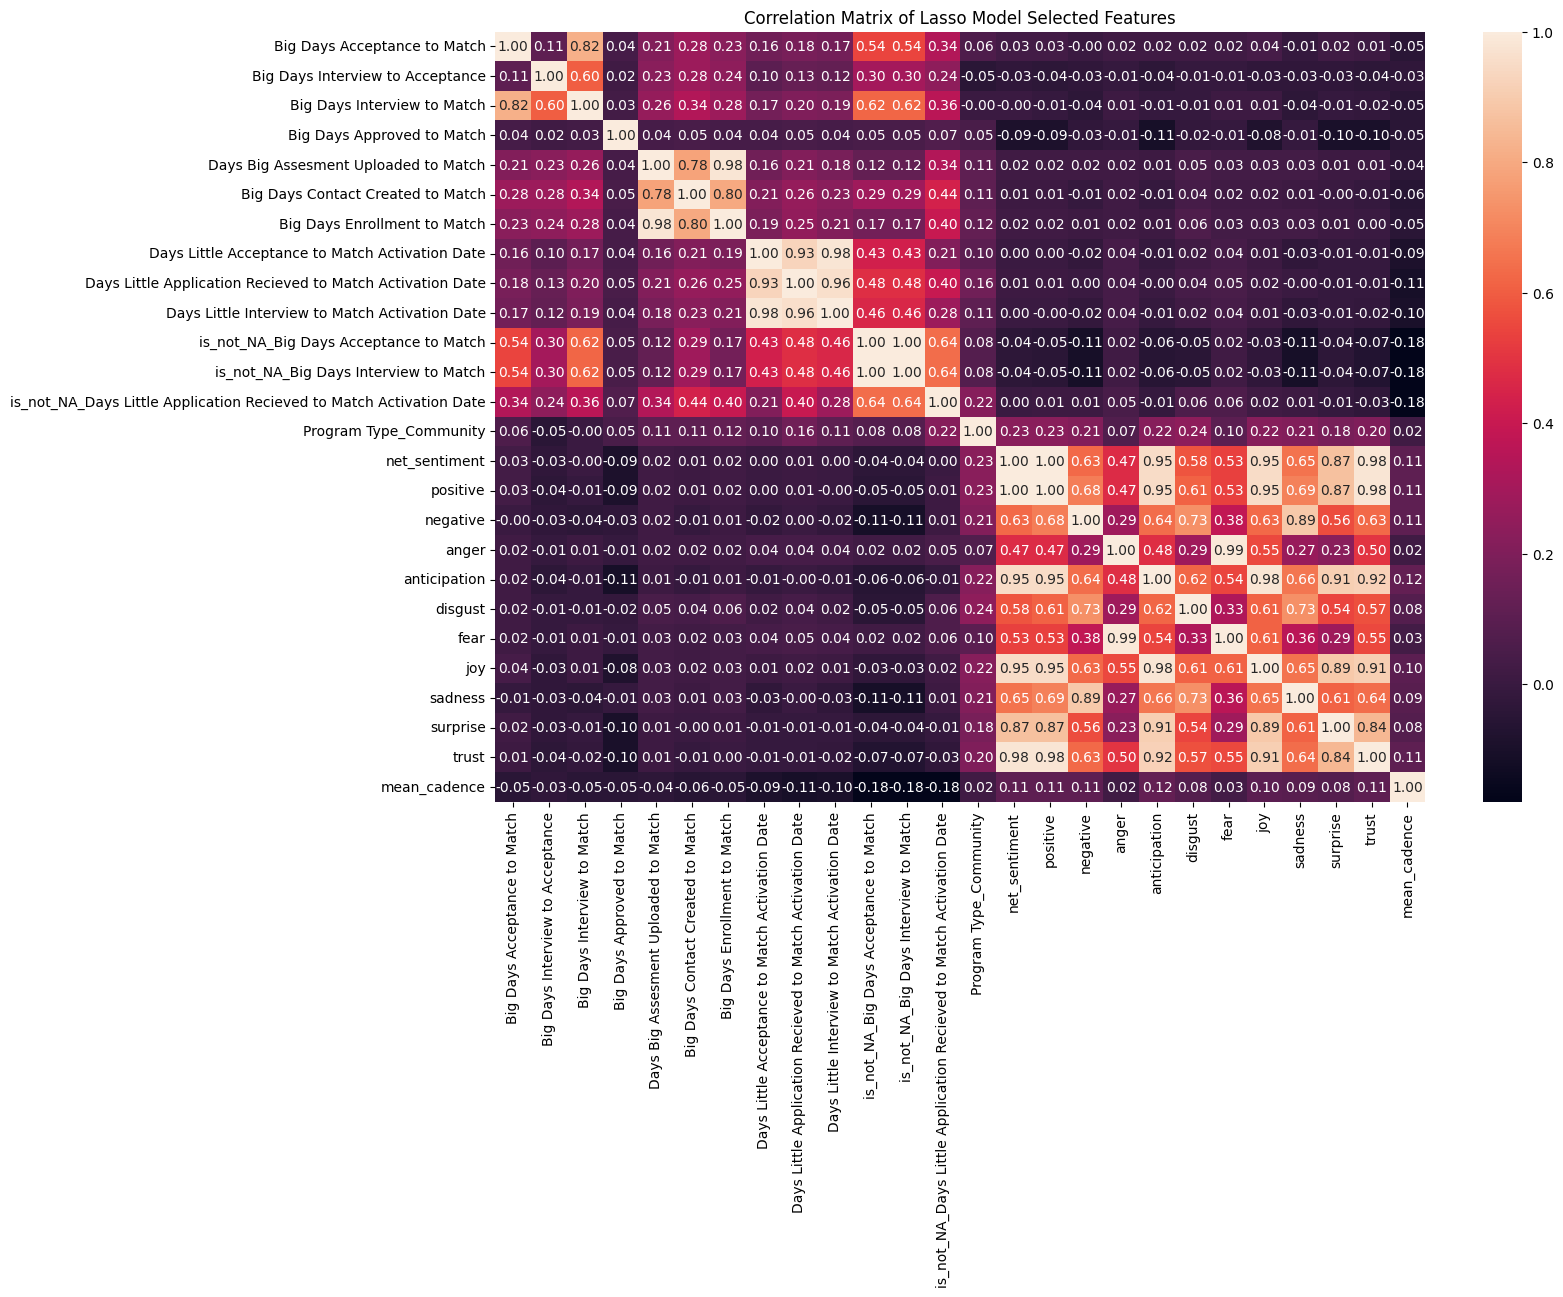

In [130]:
# Define the variables to select
selected_variables = [
    "Big Days Acceptance to Match",
    "Big Days Interview to Acceptance",
    "Big Days Interview to Match",
    "Big Days Approved to Match",
    "Days Big Assesment Uploaded to Match",
    "Big Days Contact Created to Match",
    "Big Days Enrollment to Match",
    "Days Little Acceptance to Match Activation Date",
    "Days Little Application Recieved to Match Activation Date",
    "Days Little Interview to Match Activation Date",
    "is_not_NA_Big Days Acceptance to Match",
    "is_not_NA_Big Days Interview to Match",
    "is_not_NA_Days Little Application Recieved to Match Activation Date",
    "Successful Match",
    "Big Age",
    "Program Type_Community",
    "net_sentiment",
    "positive",
    "negative",
    "anger",
    "anticipation",
    "disgust",
    "fear",
    "joy",
    "sadness",
    "surprise",
    "trust",
    "mean_cadence"
]
# Ensure all selected variables exist in the DataFrame columns
selected_variables = [var for var in selected_variables if var in training_df.columns]
# Select the specified variables for columns and rows in the correlation matrix
selected_correlation = correlation_mat.loc[selected_variables, selected_variables]
plt.figure(figsize=(15,10))
sns.heatmap(selected_correlation, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Lasso Model Selected Features")
plt.show()


In [131]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
y_pred_train = lasso_model_alpha0p5.predict(x_train)
y_pred_test = lasso_model_alpha0p5.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"Training MSE: {mse_train}")
print(f"Testin MSE: {mse_test}")
print(f"Training RMSE: {rmse_train}")
print(f"Testin RMSE: {rmse_test}")
print(f"Training R^2: {r2_train}")
print(f"Testin R^2: {r2_test}")

Training MSE: 150.9971077114573
Testin MSE: 158.7209102672199
Training RMSE: 12.288088041329184
Testin RMSE: 12.598448724633517
Training R^2: 0.6134729400261075
Testin R^2: 0.5792585070532104


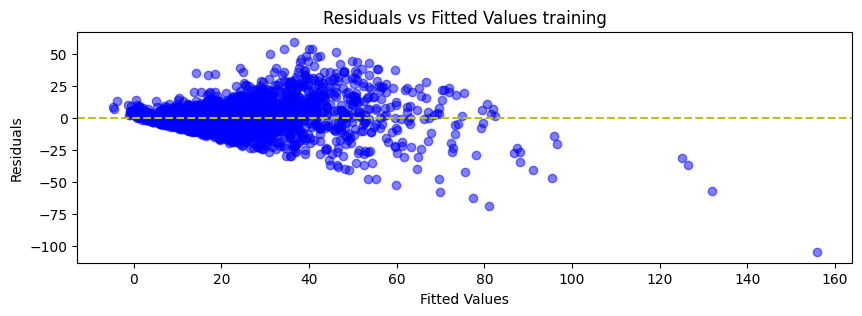

In [132]:
# Compute residuals
residuals_train = y_train - y_pred_train # Use y_train and y_pred_train

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values training')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

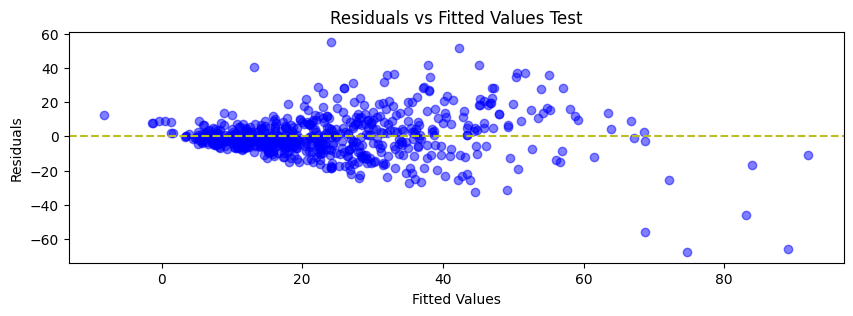

In [133]:
# Compute residuals
residuals_test = y_test - y_pred_test

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values Test')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

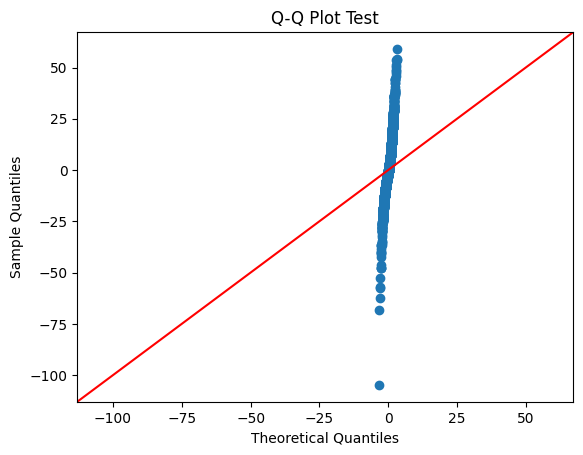

In [134]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(residuals_train, line ='45')
plt.title('Q-Q Plot Test')
plt.show()

<Figure size 1000x600 with 0 Axes>

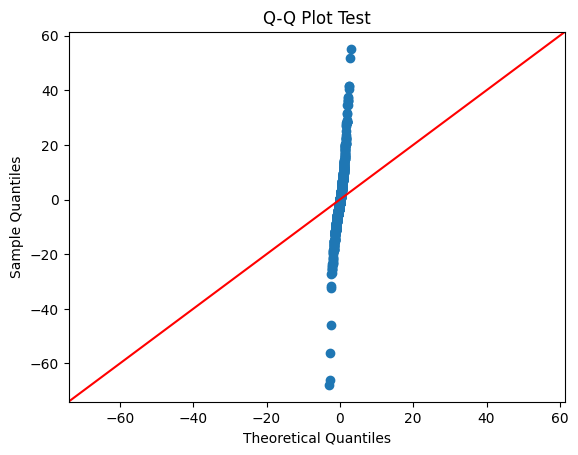

In [135]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_test, line ='45')
plt.title('Q-Q Plot Test')
plt.show()

In [136]:
# create a smaller feature pool and create a model
selected_columns = [
    "match_length",
    "Big Days Interview to Match",
    "Big Days Contact Created to Match",
    "Days Little Application Recieved to Match Activation Date",
    "Days Little Acceptance to Match Activation Date",
    "is_not_NA_Big Days Acceptance to Match",
    "is_not_NA_Days Little Application Recieved to Match Activation Date",
    "net_sentiment",
    "trust",
    "Program Type_Community",
    "mean_cadence"
]

training_df_small = training_df[selected_columns].copy()

x_train, x_test, y_train, y_test = train_test_split(training_df_small.drop(columns=["match_length"]), training_df_small["match_length"], test_size=0.2, random_state=5402)

lasso_model_small_alpha0p5 = Lasso(alpha=0.5)
lasso_model_small_alpha0p5.fit(x_train, y_train)

coefficients = lasso_model_small_alpha0p5.coef_
non_zero_coefficients = coefficients[np.abs(coefficients) > 1e-10] # Adjust tolerance as needed
non_zero_indices = np.where(np.abs(coefficients) > 1e-10)[0]

print("Non-zero coefficients:")
for coef, index in zip(non_zero_coefficients, non_zero_indices):
  print(f"Feature {x_train.columns[index]}: {coef}")



# Predict on the training set
y_pred_train = lasso_model_small_alpha0p5.predict(x_train)
y_pred_test = lasso_model_small_alpha0p5.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"Training MSE: {mse_train}")
print(f"Testin MSE: {mse_test}")
print(f"Training RMSE: {rmse_train}")
print(f"Testin RMSE: {rmse_test}")
print(f"Training R^2: {r2_train}")
print(f"Testin R^2: {r2_test}")

Non-zero coefficients:
Feature Big Days Interview to Match: 0.001211779994182072
Feature Big Days Contact Created to Match: -0.005714767364557692
Feature Days Little Application Recieved to Match Activation Date: -0.006088969290975214
Feature Days Little Acceptance to Match Activation Date: 0.0046616134288561695
Feature is_not_NA_Big Days Acceptance to Match: -3.410296457850832
Feature net_sentiment: 0.0012027854054917245
Feature trust: 0.00046883870806444997
Feature Program Type_Community: 4.620599178580848
Feature mean_cadence: 0.4297262154622225
Training MSE: 181.98306356816548
Testin MSE: 210.63388613679606
Training RMSE: 13.490109842702003
Testin RMSE: 14.513231416083602
Training R^2: 0.5284579662620082
Testin R^2: 0.46788319855300864


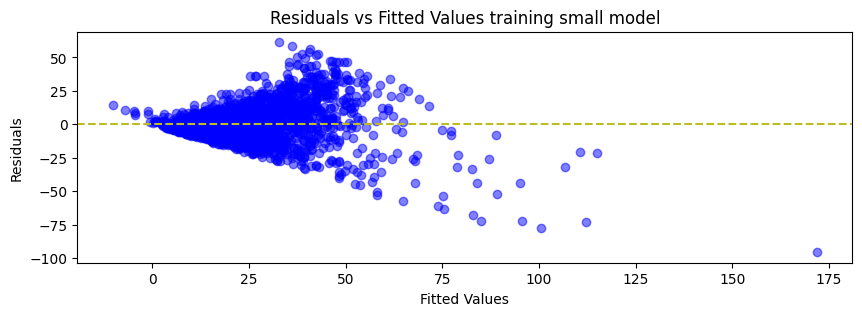

In [137]:
# Compute residuals
residuals_train = y_train - y_pred_train # Use y_train and y_pred_train

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values training small model')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

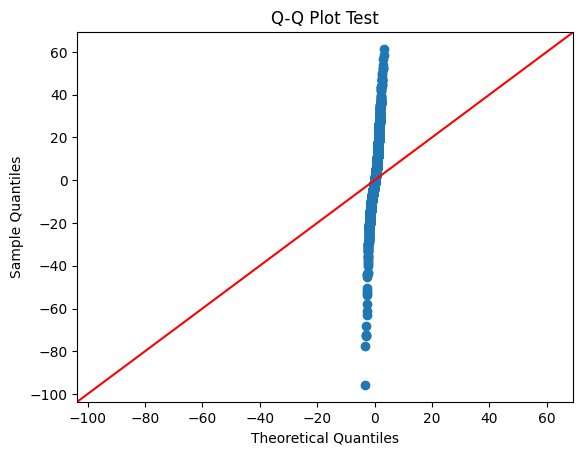

In [138]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_train, line ='45')
plt.title('Q-Q Plot Test')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.6157262455672, tolerance: 86.10678288947138
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.30913714994676, tolerance: 86.10678288947138
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.80435509234667, tolerance: 86.10678288947138
  model = cd_fast.enet_coordinate_descent_gram(


Non-zero coefficients (from cross-validated Lasso):
Big Days Interview to Match: -0.0012660037071605896
Big Days Contact Created to Match: -0.0033679291463982464
Big Days Enrollment to Match: -0.0009526156330192982
Days Little Application Recieved to Match Activation Date: -0.0036611406486252406
net_sentiment: -0.0021921164807617794
negative: 0.000813295928669983
anger: 0.003807329851375175
anticipation: 0.0067206402810142335
fear: 0.0002824879896616209
joy: -0.0018459940186491717
surprise: -0.008361490424299426
trust: 0.002510317767237755
mean_cadence: 0.2996171337125209

VIF for selected features:
                                              feature        VIF
0                         Big Days Interview to Match   1.302745
1                   Big Days Contact Created to Match   3.501039
2                        Big Days Enrollment to Match   3.273465
3   Days Little Application Recieved to Match Acti...   1.225574
4                                       net_sentiment  73.024858
5  

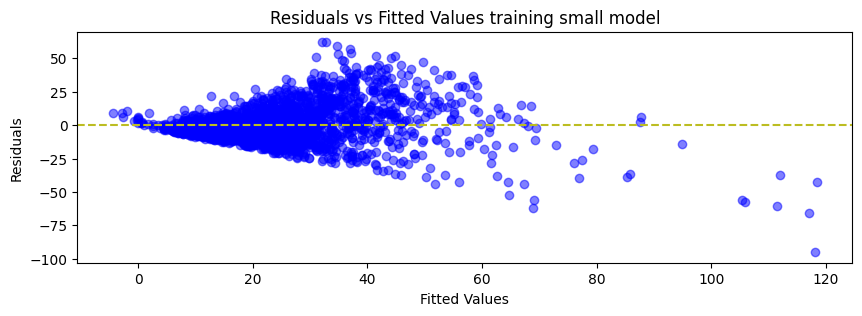

<Figure size 1000x600 with 0 Axes>

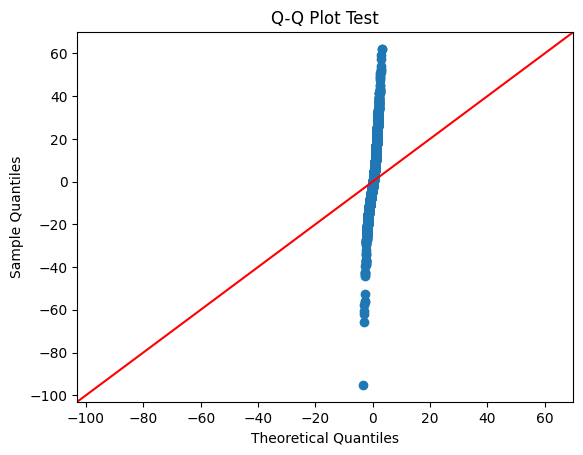

In [139]:
from sklearn.linear_model import LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Split data
x_train, x_test, y_train, y_test = train_test_split(
    training_df.drop(columns=["match_length"]),
    training_df["match_length"],
    test_size=0.2,
    random_state=12345
)

# Fit LassoCV
lasso_cv = LassoCV(cv=10, random_state=42).fit(x_train, y_train)

# Extract non-zero coefficients
coefficients = lasso_cv.coef_
non_zero_mask = np.abs(coefficients) > 0
non_zero_indices = np.where(non_zero_mask)[0]
non_zero_features = x_train.columns[non_zero_mask]

print("Non-zero coefficients (from cross-validated Lasso):")
for coef, feature in zip(coefficients[non_zero_mask], non_zero_features):
    print(f"{feature}: {coef}")

# Subset to non-zero features
x_train_selected = x_train[non_zero_features].copy()
x_test_selected = x_test[non_zero_features].copy()

# Calculate VIF
vif_df = pd.DataFrame()
vif_df["feature"] = x_train_selected.columns
vif_df["VIF"] = [variance_inflation_factor(x_train_selected.values, i) for i in range(x_train_selected.shape[1])]
print("\nVIF for selected features:")
print(vif_df)

# Select top 10 features with lowest VIF
vif_top10_features = vif_df.sort_values("VIF").head(10)["feature"].tolist()
print("\nVIF for selected top 10 features:")
print(vif_top10_features)
x_train_final = x_train_selected[vif_top10_features]
x_test_final = x_test_selected[vif_top10_features]


# Refit Lasso on final set (same alpha)
lasso_final = LassoCV(cv=5, random_state=42).fit(x_train_final, y_train)

# Predict
y_pred_train = lasso_final.predict(x_train_final)
y_pred_test = lasso_final.predict(x_test_final)

# Evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("\nModel Evaluation:")
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")
print(f"Training R^2: {r2_train:.4f}")
print(f"Testing R^2: {r2_test:.4f}")
# Compute residuals
residuals_train = y_train - y_pred_train # Use y_train and y_pred_train

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values training small model')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_train, line ='45')
plt.title('Q-Q Plot Test')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 89.75361191929551, tolerance: 77.11397128746928
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.30640653951559, tolerance: 77.11397128746928
  model = cd_fast.enet_coordinate_descent_gram(


Main effects selected by LassoCV:
Big Days Interview to Match: -0.0012660037071605896
Big Days Contact Created to Match: -0.0033679291463982464
Big Days Enrollment to Match: -0.0009526156330192982
Days Little Application Recieved to Match Activation Date: -0.0036611406486252406
net_sentiment: -0.0021921164807617794
negative: 0.000813295928669983
anger: 0.003807329851375175
anticipation: 0.0067206402810142335
fear: 0.0002824879896616209
joy: -0.0018459940186491717
surprise: -0.008361490424299426
trust: 0.002510317767237755
mean_cadence: 0.2996171337125209


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 463.1169479370583, tolerance: 77.60372389626355
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 192.3760124387918, tolerance: 77.60372389626355
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 430.63830979308113, tolerance: 77.60372389626355
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWa


Selected features after adding interactions:
net_sentiment negative: -4.744922690869184e-10
net_sentiment anticipation: -9.751431617913997e-08
net_sentiment joy: 3.5134065842201484e-08
net_sentiment trust: -6.628222279739693e-10
anticipation joy: 1.1330243461310186e-08
anticipation surprise: -1.9311336965049017e-08
anticipation trust: 1.1859094800910753e-07
anticipation mean_cadence: 3.9447641591995444e-05
fear joy: -3.9024319745240875e-07
fear trust: 2.100807064508734e-07
joy surprise: 1.6418024709113346e-09
joy trust: 8.561616764482439e-08
surprise trust: -2.2684128562159805e-07


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1534.2969464794733, tolerance: 76.64483143783787
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1713.6771860752488, tolerance: 76.64483143783787
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2292.443209255347, tolerance: 76.64483143783787
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceW


Model Evaluation:
Training MSE: 216.3392
Testing MSE: 240.7445
Training RMSE: 14.7085
Testing RMSE: 15.5159
Training R^2: 0.4223
Testing R^2: 0.4534


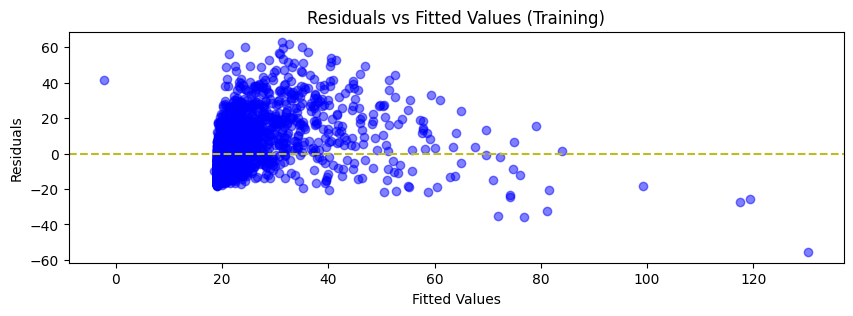

<Figure size 1000x600 with 0 Axes>

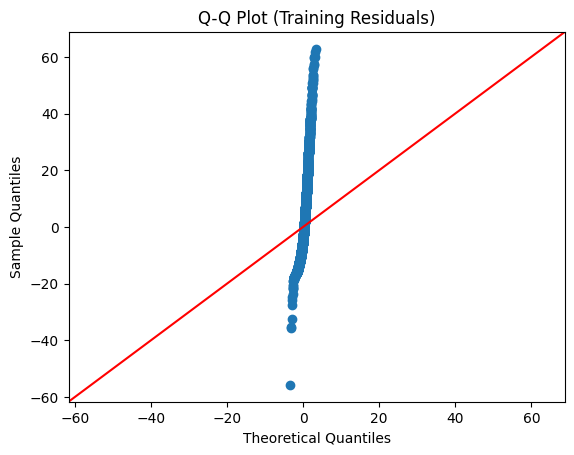

In [140]:
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Separate features and target
X = training_df.drop(columns=["match_length"])
y = training_df["match_length"]

# Step 2: Train/test split on original features
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345
)

# Step 3: First LassoCV to select main effects
lasso_cv_main = LassoCV(cv=5, random_state=42).fit(x_train, y_train)
main_coefs = lasso_cv_main.coef_
main_nonzero_mask = np.abs(main_coefs) > 0
main_selected_features = X.columns[main_nonzero_mask]

print("Main effects selected by LassoCV:")
for coef, feature in zip(main_coefs[main_nonzero_mask], main_selected_features):
    print(f"{feature}: {coef}")

# Step 4: Restrict original data to selected features
X_reduced = X[main_selected_features]

# Step 5: Generate interactions among selected features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = poly.fit_transform(X_reduced)
feature_names = poly.get_feature_names_out(main_selected_features)
X_interact_df = pd.DataFrame(X_interact, columns=feature_names, index=X.index)

# Step 6: Train/test split on interaction-expanded data
x_train_int, x_test_int, y_train_int, y_test_int = train_test_split(
    X_interact_df, y, test_size=0.2, random_state=12345
)

# Step 7: LassoCV on interactions
lasso_cv_final = LassoCV(cv=5, random_state=42).fit(x_train_int, y_train_int)
final_coefs = lasso_cv_final.coef_
final_nonzero_mask = np.abs(final_coefs) > 0
final_selected_features = X_interact_df.columns[final_nonzero_mask]

print("\nSelected features after adding interactions:")
for coef, feature in zip(final_coefs[final_nonzero_mask], final_selected_features):
    print(f"{feature}: {coef}")

# Step 8: Subset to selected interaction features
x_train_final = x_train_int[final_selected_features].copy()
x_test_final = x_test_int[final_selected_features].copy()

# Step 9: Refit model and evaluate
lasso_final = LassoCV(cv=5, random_state=42).fit(x_train_final, y_train_int)

y_pred_train = lasso_final.predict(x_train_final)
y_pred_test = lasso_final.predict(x_test_final)

mse_train = mean_squared_error(y_train_int, y_pred_train)
mse_test = mean_squared_error(y_test_int, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train_int, y_pred_train)
r2_test = r2_score(y_test_int, y_pred_test)

print("\nModel Evaluation:")
print(f"Training MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Testing RMSE: {rmse_test:.4f}")
print(f"Training R^2: {r2_train:.4f}")
print(f"Testing R^2: {r2_test:.4f}")

# Step 10: Plot residuals
residuals_train = y_train_int - y_pred_train

plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5)
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values (Training)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
sm.qqplot(residuals_train, line='45')
plt.title('Q-Q Plot (Training Residuals)')
plt.show()


Top 20 Features:
anticipation
mean_cadence
trust
is_not_NA_Days Little Application Recieved to Match Activation Date
Big Days Acceptance to Match
Big Days Approved to Match
Big Days Enrollment to Match
ReEnroll_No.x
surprise
negative
fear
Big Days Contact Created to Match
Marital_NA
Has Rationale for Match
joy
is_not_NA_Big Days Interview to Acceptance
sadness
is_not_NA_Days Little Interview to Match Activation Date
is_not_NA_Days Match Activation to Closure Meeting Date
Days Little Application Recieved to Match Activation Date

With original + interaction terms:
RMSE: 7.133
R²: 0.853


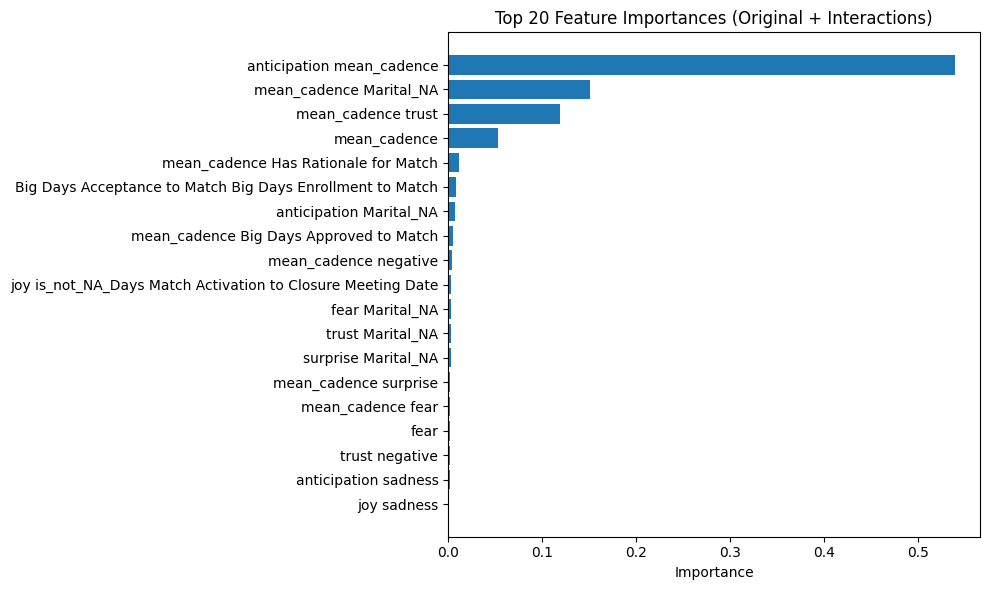

In [141]:
# XGBoost with interaction
from sklearn.ensemble import GradientBoostingRegressor
# Step 1: Prepare data
X = training_df.drop(columns=["match_length"])
y = training_df["match_length"]

# Step 2: Initial train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2045)

# Step 3: Train initial GBR model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)

# Step 4: Get top 20 important features
importances = gbr.feature_importances_
top20_idx = np.argsort(importances)[-20:][::-1]
top20_features = x_train.columns[top20_idx]

print("\nTop 20 Features:")
for feature in top20_features:
    print(feature)

# Step 5: Restrict to top 20 features
X_top20 = X[top20_features]

# Step 6: Create interaction-only terms (among top 20)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interact = poly.fit_transform(X_top20)
interaction_features = poly.get_feature_names_out(top20_features)
X_interact_df = pd.DataFrame(X_interact, columns=interaction_features, index=X.index)

# Step 7: Concatenate original + interaction features
X_combined = pd.concat([X_top20, X_interact_df], axis=1)

# Step 8: Train-test split on combined features
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(
    X_combined, y, test_size=0.2, random_state=2045
)

# Step 9: Train final Gradient Boosting model
gbr_final = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_final.fit(x_train_final, y_train_final)

# Step 10: Predict and evaluate
y_pred_final = gbr_final.predict(x_test_final)
mse = mean_squared_error(y_test_final, y_pred_final)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_final, y_pred_final)

print("\nWith original + interaction terms:")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Step 11: Plot top 20 feature importances
importances_final = gbr_final.feature_importances_
top_indices = np.argsort(importances_final)[-20:][::-1]
top_features_final = X_combined.columns[top_indices]
top_importances = importances_final[top_indices]

plt.figure(figsize=(10, 6))
plt.barh(top_features_final[::-1], top_importances[::-1])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Original + Interactions)")
plt.tight_layout()
plt.show()

In [149]:
# Using gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor

training_df_consistent = training_df.drop(columns=[ "Program Type_Site Based Plus", "is_not_NA_Days Match Activation to Closure Meeting Date", "Same County", "Same State", "Big Days Acceptance to Match"])
# Split data
x_train, x_test, y_train, y_test = train_test_split(
    training_df_consistent.drop(columns=["match_length"]),
    training_df_consistent["match_length"],
    test_size=0.2,
    random_state=2045
)

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(x_train, y_train)

# Predict
y_pred = gbr.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 7.159
R²: 0.852


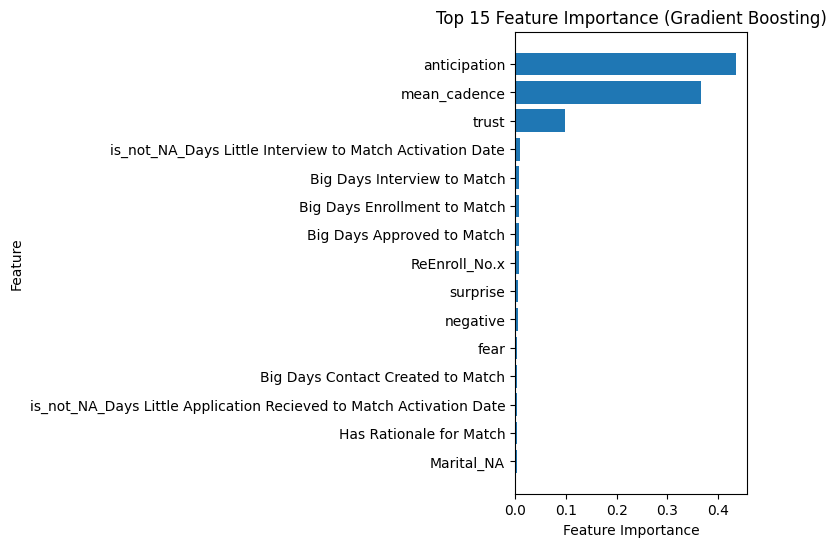

In [163]:


# Assuming 'gbr' is your trained GradientBoostingRegressor model and 'x_train' has the feature names
feature_importance = gbr.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for easier sorting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = importance_df.head(15)

# Plotting
plt.figure(figsize=(3, 6))
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Feature Importance (Gradient Boosting)")
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.show()


<ipython-input-166-8474e03c73bf>:54: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


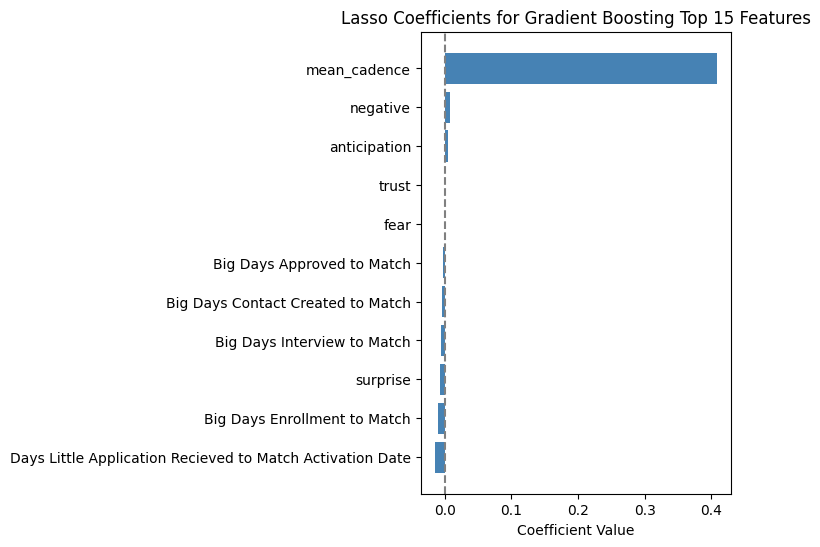

In [166]:
overlapping_features = [
    "anticipation",
    "mean_cadence",
    "trust",
    "Big Days Interview to Match",
    "Big Days Enrollment to Match",
    "Big Days Approved to Match",
    "Big Days Contact Created to Match",
    "Days Little Application Recieved to Match Activation Date",
    "negative",
    "surprise",
    "fear"
]



# Full Lasso coefficients
lasso_coeffs = {
    "Big Days Acceptance to Match": 0.005643176456445587,
    "Big Days Interview to Match": -0.006248255201494256,
    "Big Days Approved to Match": -0.003345661715863669,
    "Days Big Assesment Uploaded to Match": 0.009124748103453819,
    "Big Days Contact Created to Match": -0.0036751294732363716,
    "Big Days Enrollment to Match": -0.010635851816537818,
    "Days Little Acceptance to Match Activation Date": 0.005093452453150172,
    "Days Little Application Recieved to Match Activation Date": -0.014881887824767605,
    "Days Little Interview to Match Activation Date": 0.008368727171099507,
    "Program Type_Community": 3.373891519344979,
    "net_sentiment": -0.0006266394602750107,
    "positive": 3.7831420454392905e-05,
    "negative": 0.007559815521763193,
    "anger": -0.004022556487800813,
    "anticipation": 0.005222238005526569,
    "disgust": 0.008758098477187741,
    "fear": -4.9879954003045806e-05,
    "joy": -0.0011638197836486852,
    "sadness": -0.0031017547829037474,
    "surprise": -0.006971530239701965,
    "trust": 0.0009582613730333132,
    "mean_cadence": 0.4079622489829515
}

# Filter
filtered = {k: v for k, v in lasso_coeffs.items() if k in overlapping_features}
coeff_df = pd.DataFrame(filtered.items(), columns=["Feature", "Coefficient"])
coeff_df.sort_values("Coefficient", inplace=True)

# Plot
plt.figure(figsize=(4, 6))
plt.barh(coeff_df["Feature"], coeff_df["Coefficient"], color="steelblue")
plt.axvline(0, color="gray", linestyle="--")
plt.title("Lasso Coefficients for Gradient Boosting Top 15 Features")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

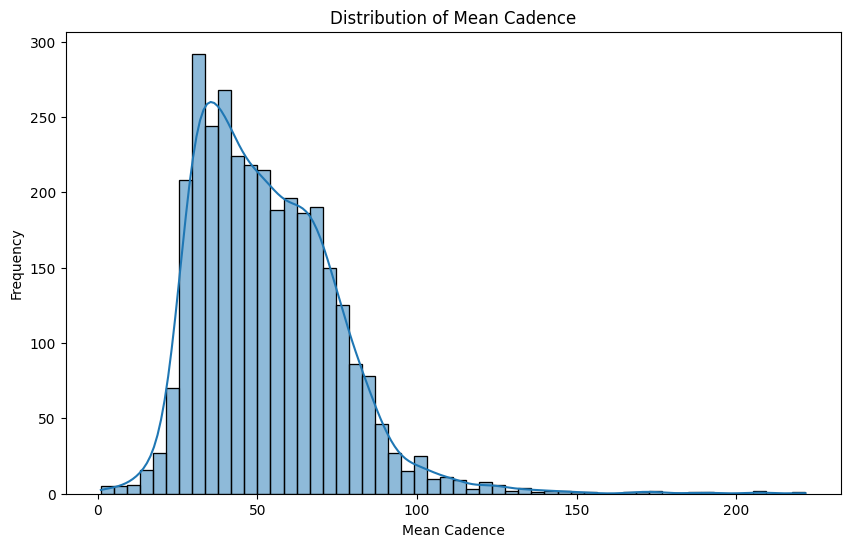

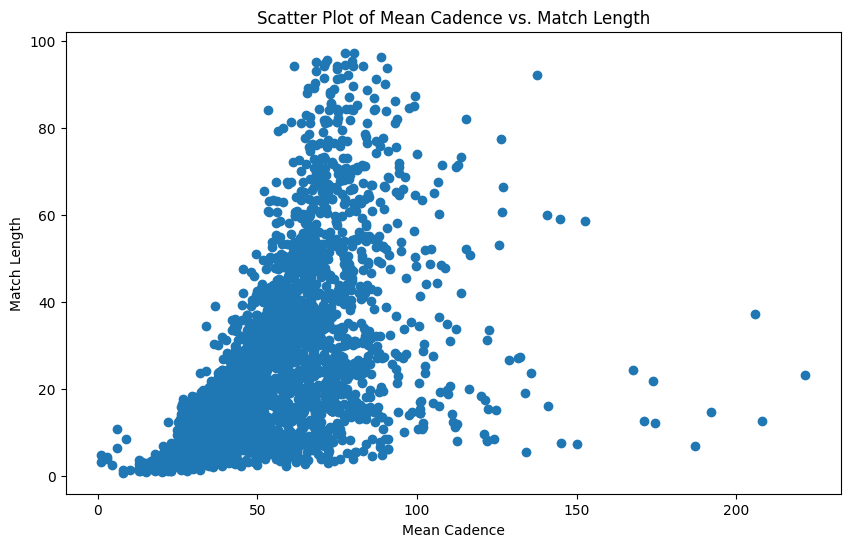

In [ ]:
# plot match length vs cadence mean
# do a distribution plot and then categorize them into blovks
plt.figure(figsize=(10, 6))
sns.histplot(training_df['mean_cadence'], kde=True)
plt.title('Distribution of Mean Cadence')
plt.xlabel('Mean Cadence')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(training_df['mean_cadence'], training_df['match_length'])
plt.xlabel('Mean Cadence')
plt.ylabel('Match Length')
plt.title('Scatter Plot of Mean Cadence vs. Match Length')
plt.show()

In [ ]:
# predicting the

testing_data_path = input("Enter the drive path of testing data: ")

Enter the drive path of testing data: /content/combined_complete_test_df.csv


In [ ]:
testing_df = pd.read_csv(testing_data_path).drop(columns=["...1.x", "...1.y", "Match ID 18Char", "big_occupation_category_Other", "Same State", "Same County"])
rename_dict = {
    "ReEnroll_NA": "ReEnroll_NA.x",
    "ReEnroll_No": "ReEnroll_No.x",
    "ReEnroll_Yes": "ReEnroll_Yes.x"
}
testing_df = testing_df.rename(columns=rename_dict)

print(testing_df.shape)



(300, 134)


In [ ]:

len(x_train.columns)


134

In [ ]:
len(testing_df.columns)


134

In [ ]:
testing_df.shape

(300, 134)

In [ ]:
# Ensure columns in testing_df match and follow the same order as x_train
missing_cols = set(x_train.columns) - set(testing_df.columns)
extra_cols = set(testing_df.columns) - set(x_train.columns)

print("Missing columns in testing_df:", missing_cols)
print("Extra columns in testing_df:", extra_cols)

# Add missing columns with 0s (or np.nan if preferred)
for col in missing_cols:
    testing_df[col] = 0  # or np.nan

# Remove extra columns
testing_df_aligned = testing_df[x_train.columns]

# Confirm shape matches
print("x_train shape:", x_train.shape)
print("testing_df_aligned shape:", testing_df_aligned.shape)


Missing columns in testing_df: set()
Extra columns in testing_df: set()
x_train shape: (2543, 134)
testing_df_aligned shape: (300, 134)


In [ ]:
testing_df_aligned.head()

,Big Days Acceptance to Match,Big Days Interview to Acceptance,Big Days Interview to Match,Big Days Approved to Match,Days Big Assesment Uploaded to Match,Big Days Contact Created to Match,Big Days Enrollment to Match,Days Little Acceptance to Match Activation Date,Days Little Application Recieved to Match Activation Date,Days Little Interview to Match Activation Date,...,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,mean_cadence
0,0,0,0,3,0,0,0,0,0,0,...,0,0,593,0,158,0,0,0,4986,30.000
1,0,0,0,20,0,0,0,0,0,0,...,4815,7572,82325,2966,9643,41127,3798,12904,96995,84.000
2,0,0,0,14,0,0,0,0,0,0,...,3778,2088,68260,0,0,28936,2030,4788,19917,40.750
3,0,0,0,1,0,0,0,0,0,0,...,2011,1831,30869,8,719,15520,54,2514,11634,29.500
4,0,0,0,9,0,0,0,0,0,0,...,1146,696,28174,234,183,8515,450,2978,6679,38.375


In [ ]:
non_numeric_cols = testing_df_aligned.select_dtypes(include='object').columns
print("Non-numeric columns in testing_df_aligned:", non_numeric_cols.tolist())


Non-numeric columns in testing_df_aligned: []


In [ ]:
testing_df_aligned.fillna(0, inplace=True)


In [ ]:
# Predict
match_length_pred_test_data = gbr.predict(testing_df_aligned)


In [ ]:
testing_data_raw = pd.read_csv(testing_data_path)

results_df = pd.DataFrame({
    "Match ID 18Char": testing_data_raw["Match ID 18Char"],
    "predicted_match_length": match_length_pred_test_data
})

results_df.head()

,Match ID 18Char,predicted_match_length
0,a1v2J0000027CXKQA2,14.739540
1,a1v2J0000027JFCQA2,75.249962
2,a1v2J0000027KBoQAM,24.643310
3,a1v2J0000027KCEQA2,29.178007
4,a1v2J0000027KCbQAM,20.993723


In [ ]:
results_df.to_csv('/content/drive/Shareddrives/minneMUDAC2025/Data/predicted_match_lengths_on_testing_data.csv', index=False)
